In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
def seed_everything(seed=2020):
    random.seed(seed)
    np.random.seed(seed)
seed_everything(42)

warnings.filterwarnings("ignore")
%matplotlib inline

# Pulsar star

In [55]:
data = pd.read_csv("../../data/pulsar_stars.csv")
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [39]:
print("data info  :",data.info())
print("Missing values:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB
data i

In [40]:
data.columns = data.columns.str.strip()
data.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [41]:
# data['target_class'].value_counts()
# view the percentage distribution of target_class column
data['target_class'].value_counts()/np.float(len(data))

0    0.908426
1    0.091574
Name: target_class, dtype: float64

In [42]:
round(data.describe(),3)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000,17898.000
mean,111.080,46.550,0.478,1.770,12.614,26.327,8.304,104.858,0.092
std,25.653,6.843,1.064,6.168,29.473,19.471,4.506,106.515,0.288
min,5.812,24.772,-1.876,-1.792,0.213,7.370,-3.139,-1.977,0.000
25%,100.930,42.376,0.027,-0.189,1.923,14.437,5.782,34.961,0.000
50%,115.078,46.947,0.223,0.199,2.802,18.461,8.434,83.065,0.000
75%,127.086,51.023,0.473,0.928,5.464,28.428,10.703,139.309,0.000
max,192.617,98.779,8.070,68.102,223.392,110.642,34.540,1191.001,1.000


## Data split

In [43]:
X = data.drop(['target_class'], axis=1)

y = data['target_class']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

In [46]:
y_train.shape

(14318,)

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

cols = X_train.columns

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [49]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000,14318.000000
mean,0.561470,0.294481,0.237736,0.051661,0.056903,0.184856,0.296784,0.089196
std,0.139138,0.092577,0.108760,0.089942,0.134242,0.189920,0.120862,0.088896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.507260,0.238294,0.191447,0.022988,0.007706,0.068526,0.228607,0.030281
50%,0.583557,0.299894,0.211056,0.028474,0.011634,0.107609,0.300615,0.070892
75%,0.648665,0.354664,0.236647,0.038893,0.023831,0.205347,0.361597,0.118141
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
from sklearn.metrics import matthews_corrcoef, confusion_matrix,precision_recall_curve,auc,f1_score,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score


def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y):
    
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    print ("\nrecall score:\n",(recall_score(dtest_y,predictions)))
    print ("\nf1 score:\n",(f1_score(dtest_y,predictions)))
#     print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
    print ("\nmatthews_corrcoef:\n", (matthews_corrcoef(dtest_y, predictions)))
    #cross validation
    
    # Graph
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

## Fit SVC

MODEL - OUTPUT
*****************************************************************************************
SVC(probability=True)

accuracy_score : 0.9818435754189944

recall score:
 0.8284671532846716

f1 score:
 0.8747591522157997

matthews_corrcoef:
 0.8665775957943025


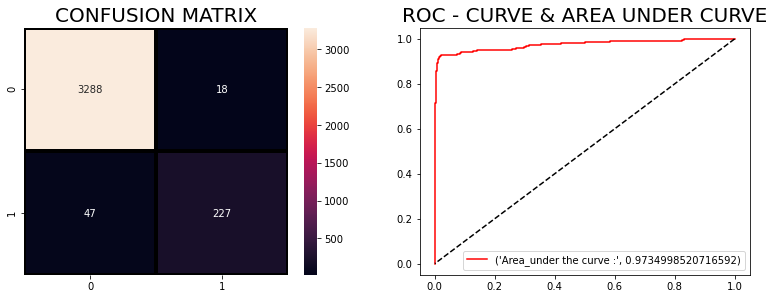

In [51]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(probability=True) 

model(svc ,X_train,y_train,X_test,y_test)

# Fit DT

MODEL - OUTPUT
*****************************************************************************************
DecisionTreeClassifier()

accuracy_score : 0.9695530726256983

recall score:
 0.8321167883211679

f1 score:
 0.8070796460176991

matthews_corrcoef:
 0.7909902894595081


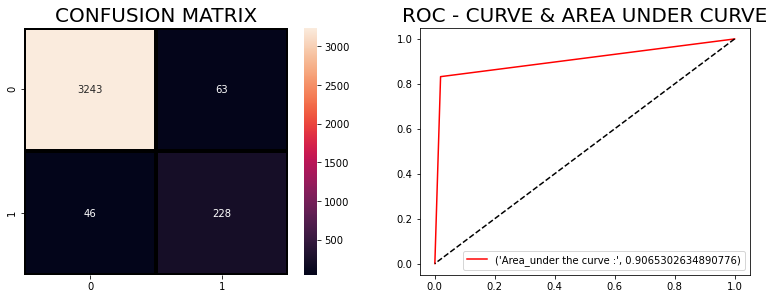

In [52]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
model(clf ,X_train,y_train,X_test,y_test)